In [1]:
#Importing our Packages
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as rmse
import seaborn as sns

from sklearn.metrics import mean_absolute_error as mae


from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score


from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold

from sklearn.model_selection import KFold

import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from xgboost import plot_importance


# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import loguniform


In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
pwd

'/Users/kenzaelhoussaini/code/Jehadel/reestimator/notebooks'

In [4]:
#Load Libraries and Create engine Connection

import pymysql
import pandas as pd
import numpy as np
import sqlalchemy
import gc
engine =sqlalchemy.create_engine(
        sqlalchemy.engine.url.URL.create(
        drivername="mysql+pymysql",
        username='Estimators',  # e.g. "my-database-user"
        password='Estimator2021',  # e.g. "my-database-password"
        host='34.77.88.127',  # e.g. "127.0.0.1"
        port=3306,  # e.g. 3306
        database='Housing_France',  # e.g. "my-database-name"
    ))

conn = engine.connect().execution_options(stream_results=True)

In [5]:
#Load Libraries and Create engine Connection

import pymysql
import pandas as pd
import numpy as np
import sqlalchemy
import gc

def get_data(querystring,chunk):
    engine =sqlalchemy.create_engine(
    sqlalchemy.engine.url.URL.create(
    drivername="mysql+pymysql",
    username='Estimators',  # e.g. "my-database-user"
    password='Estimator2021',  # e.g. "my-database-password"
    host='34.77.88.127',  # e.g. "127.0.0.1"
    port=3306,  # e.g. 3306
    database='Housing_France',  # e.g. "my-database-name"
    ))
    conn = engine.connect().execution_options(stream_results=True)
    frame = pd.DataFrame()
    for chunk_dataframe in pd.read_sql(
            querystring, conn, chunksize=chunk):
            print(f"Got dataframe w/{len(chunk_dataframe)} rows")
            frame= frame.append(chunk_dataframe)
            # ... do something with dataframe ...
            
    return frame

In [6]:
#Load Libraries and Create engine Connection

import pymysql
import pandas as pd
import numpy as np
import sqlalchemy
import gc
engine =sqlalchemy.create_engine(
        sqlalchemy.engine.url.URL.create(
        drivername="mysql+pymysql",
        username='Estimators',  # e.g. "my-database-user"
        password='Estimator2021',  # e.g. "my-database-password"
        host='34.77.88.127',  # e.g. "127.0.0.1"
        port=3306,  # e.g. 3306
        database='Housing_France',  # e.g. "my-database-name"
    ))

conn = engine.connect().execution_options(stream_results=True)

In [7]:
#Template for getting some data
df = get_data("""select * from data_working_update WHERE nom_commune IN 
('Paris 9e Arrondissement','Paris 8e Arrondissement',
 'Paris 7e Arrondissement','Paris 6e Arrondissement',
 'Paris 5e Arrondissement', 'Paris 4e Arrondissement',
 'Paris 3e Arrondissement','Paris 2e Arrondissement',
 'Paris 20e Arrondissement', 'Paris 1er Arrondissement',
 'Paris 19e Arrondissement','Paris 18e Arrondissement',
 'Paris 17e Arrondissement',
 'Paris 16e Arrondissement', 'Paris 15e Arrondissement',
 'Paris 14e Arrondissement','Paris 13e Arrondissement',
 'Paris 12e Arrondissement', 'Paris 11e Arrondissement',
 'Paris 10e Arrondissement', 
 'Nice',
 'Marseille 9e Arrondissement','Marseille 8e Arrondissement', 'Marseille 7e Arrondissement',
 'Marseille 6e Arrondissement', 'Marseille 5e Arrondissement', 'Marseille 4e Arrondissement',
 'Marseille 3e Arrondissement', 'Marseille 2e Arrondissement','Marseille 1er Arrondissement',
 'Marseille 16e Arrondissement','Marseille 15e Arrondissement','Marseille 14e Arrondissement',
 'Marseille 13e Arrondissement', 'Marseille 12e Arrondissement','Marseille 11e Arrondissement',
 'Marseille 10e Arrondissement') """, 1000)

Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got datafram

In [8]:
data = df.copy()

In [9]:
def drop_duplicates(df, col_name):
    return df.drop_duplicates(subset=[col_name])

data = drop_duplicates(df=data, col_name = 'id_mutation')
data.shape

(263337, 17)

In [10]:
df2 = data.copy()

prixmetr = df2['valeur_fonciere'].values / df2['surface_reelle_bati'].values
df2.loc[:,'prixmetre'] = prixmetr
df2.shape

(263337, 18)

In [11]:
df2=df2[
    (df2['prixmetre'] < 150_000) & (df2['prixmetre'] > 10_000)]

df2=df2[
    (df2['nombre_pieces_principales'] < 8) & (df2['nombre_pieces_principales'] > 0)]


df2=df2[
    (df2['surface_reelle_bati'] < 250) & (df2['surface_reelle_bati'] > 10)]

df2 = df2.drop(columns = 'nature_mutation')
df2.shape

(68840, 17)

In [12]:
def encoding_categ_column(df, col_name):
    
    L = list(df[col_name].unique())
    if '' in L:
        df[col_name].replace("", "NoValue", inplace=True) #Replace NaN by "NoCodeNature"
    
    ohe = OneHotEncoder(sparse = False) # Instanciate encoder
    ohe.fit(df[[col_name]]) # Fit encoder  ---> OneHotEncoder(sparse=False)
    
    col_encoded = ohe.transform(df[[col_name]]) # Encode

    dicts_col = {}
    keys = list(ohe.categories_[0])
    values = col_encoded.T.astype(int)
    
    for i,j in enumerate(keys):
        dicts_col[j] = values[i,:]

    result = pd.DataFrame.from_dict(dicts_col)
    
    df = df.reset_index(drop=True)
    
    #Concat df and result dataframes
    data_res = pd.concat([df, result], axis = 1)
    
    if 'NoValue' in list(data_res.columns):
        data_res = data_res.drop(columns= ['NoValue',col_name] )
    else:
        data_res = data_res.drop(columns= col_name)
        
    return data_res 

In [13]:
data_t = encoding_categ_column(df = df2, col_name = 'nom_commune')

data_t2 = data_t

data_t3 = encoding_categ_column(df = data_t2, col_name = 'type_local')
data_t3.shape

data_t4 = data_t3

# Function : training_regression_models

In [15]:
def training_regression_models(df, col_list, target_var, scaler,model,params_cv, randomsearch_dict,  nsplits = 10, scor = "neg_mean_absolute_error"):
        
    #df: dataframe
    # col_lis : list of features tu use in training
    
    #by default, col_list = cols_removd_target
    #target_var = 'prixmetre' " old one -----> 'valeur_fonciere' "
    
    # scaler = StandardScaler() "we can use RobustScaler()"
    # model : "LinearRegression", "RandomForest", "XGBoost"
    # params : dict for GridSearch ; we do not use it for this initial version
    # nsplits, nrepeats : arguments in RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # randomsearch_reg_iter --> Please see, RandomizedSearchCV(model, params, n_iter=randomsearch_reg_iter, ..
        #by default n_iter = 500
        
    #randomsearch_xgboost_iter --> Please see, RandomizedSearchCV(estimator = xgboost_regression, ..., n_iter = randomsearch_xgboost_iter
        
    """
      ** Iteration numbers for randomsearch for models Ridge, Lasso, RandomForest
      
        reg = 2
        forest = 2
        xgboost = 2

        randomsearch_dict = {"reg_iter": reg,
                          "forest_iter": forest,
                           "xgboost_iter": xgboost} 
                         
        **Example of parameters for randomsearch for Linear regression model :**
        # define search params
        params = dict()
        params['alpha'] = list(range(3)) 
        params['fit_intercept'] = [True, False]
        params['normalize'] = [False, True]

    
        **Example of parameters for randomsearch for Randomforest model :**
        n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 3)] # number of trees 
                                                                                    #in the random forest
        max_features = ['auto', 'sqrt'] # number of features in consideration at every split
        max_depth = [int(x) for x in np.linspace(10, 120, num = 3)] # maximum number of levels
                                                                        #allowed in each decision tree
        min_samples_split = [2, 6, 10] # minimum sample number to split a node
        min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
        bootstrap = [True, False] # method used to sample data points
        
        params_cv = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}
        
        **Example of parameters for randomsearch for XGBoost model :**
        
         params_cv = {"learning_rate": (0.05, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4],}
                         
     """
    
    #scor 
    
    # define dataset
    y = df[target_var]
    X = df[col_list]
    
    
    #instantiating train test split while creating my X and y train and test variables
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    #instantiating the standard scaler and setting it equal to ss
    #scaling my Xs
    
    scaler.fit(X_train)
    X_train_sc = scaler.transform(X_train)
    X_test_sc = scaler.transform(X_test)
    
    # define model
    if model == "LinearRegression":
        
        la= Lasso()
        ri = Ridge()
        #lr = LinearRegression()
        models = [la,ri] #[la,ri,lr]
        
        feature_importances = {'Lasso': np.zeros((len(cols_removd_target), )), "Ridge" : np.zeros((len(cols_removd_target), ))} # dict Keys :(la, ri and lr) models , values : .coef_
        result = {'Lasso': {}, "Ridge" : {}} # dict Keys :(XGBoost) model , values : result after RandomizedSearchCV
        
        for model in models:
            
            # define search          
            print("****  RandomizedSearchCV  ****")
            # define evaluation
            cv = KFold(n_splits=nsplits)
            
            search = RandomizedSearchCV(model, params_cv, n_iter=randomsearch_dict['reg_iter'], 
                                        scoring= scor, n_jobs=-1, 
                                        cv=cv, random_state=1)
            
            # execute search
            res = search.fit(X_train_sc, y_train)
           
            model = model.set_params(**res.best_params_)
            #print("model  ", model)

            
            linear = model.fit(X_train_sc,y_train)
            
            # Use the model on the testing data to predict the results
            y_pred = linear.predict(X_test_sc)

            
            if model == la:
                feature_importances["Lasso"] = linear.coef_
                #feature_importances[str(model)] = linear.coef_
            
            if model == ri:
                feature_importances["Ridge"] = linear.coef_
                
            # for each model, we add a RandomizedSearchCV
            if model == la:
                #return feature_importances, result
                result["Lasso"]['r2'] = 100*(r2_score(y_test, y_pred))
                result["Lasso"]['mape'] = round(mape(y_test, y_pred), 2)
                result["Lasso"]['rmse'] = rmse(y_test, y_pred)

            if model == ri:
                result["Ridge"]['r2'] = 100*(r2_score(y_test, y_pred))
                result["Ridge"]['mape'] = round(mape(y_test, y_pred), 2)
                result["Ridge"]['rmse'] = rmse(y_test, y_pred)


            
    if model == "RandomForest":    
        
        print("****  RandomizedSearchCV  ****")
        
        result = {'RandomForest': {}} # dict Keys :(XGBoost) model , values : result after RandomizedSearchCV
                      
        random_forest = RandomForestRegressor(random_state = 42)
        
        search = RandomizedSearchCV(estimator = random_forest, param_distributions = params_cv,
               n_iter = randomsearch_dict['forest_iter'], cv = 5, verbose=2, random_state=42, n_jobs = -1)
        
        # execute search
        res = search.fit(X_train_sc, y_train)
        
        random_forest = random_forest.set_params(**res.best_params_)
        
        #Fitting the Random Forest model
        random_forest.fit(X_train_sc,y_train)

        # Use the model on the testing data to predict the results
        y_pred = random_forest.predict(X_test_sc)
        
       

        feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                       index = X_train.columns,
                                       columns=['importance']).sort_values('importance', ascending=False)

        #print(feature_importances)
        
        # RandomizedSearchCV
        
        #return feature_importances, result
        
        result["RandomForest"]['r2'] = 100*(r2_score(y_test, y_pred))
        result["RandomForest"]['mape'] = mape(y_test, y_pred)
        result["RandomForest"]['rmse'] = rmse(y_test, y_pred)
            

       
    if model == "XGBoost":
        
        print("****  RandomizedSearchCV  ****")
        result = {'XGBoost': {}} # dict Keys :(XGBoost) model , values : result after RandomizedSearchCV

              
        xgboost_regression = xgb.XGBRegressor(booster = 'gbtree', objective ='reg:squarederror', 
                                    colsample_bytree = 0.3, learning_rate = 0.35,
          max_depth = 10, alpha = 0.1, n_estimators = 500)
        
        search = RandomizedSearchCV(estimator = xgboost_regression, 
                           param_distributions = params_cv, 
                           n_iter = randomsearch_dict['xgboost_iter'], cv = 3, verbose=2, #n_iter=1000
                           random_state=0, n_jobs = -1)     
        
        #Fitting the Random Forest model
        res = search.fit(X_train_sc,y_train)
        
        # summarize result
        #print('Best Score: %s' % res.best_score_)
        #print('Best Hyperparameters: %s' % res.best_params_)
        
        xgboost_regression = xgboost_regression.set_params(**res.best_params_)
       
        #Fitting the XGBoost model
        xgboost_regression.fit(X_train_sc,y_train)

        # Use the model on the testing data to predict the results
        y_pred = xgboost_regression.predict(X_test_sc)
        
        
        feature_importances = pd.DataFrame(xgboost_regression.feature_importances_,
                                       index = X_train.columns,
                                       columns=['importance']).sort_values('importance', ascending=False)
        
        
        #return feature_importances, result
        
        result["XGBoost"]['r2'] = 100*(r2_score(y_test, y_pred))
        result["XGBoost"]['mape'] = mape(y_test, y_pred)
        result["XGBoost"]['rmse'] = rmse(y_test, y_pred)
        

        #print(feature_importances)
        fig, ax = plt.subplots(figsize=(17, 7))
        plot_importance(xgboost_regression, ax = ax)
        plt.show()
          
    return feature_importances, result


# Class

In [46]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# Import packages
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as rmse

from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from xgboost import plot_importance

# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

class Trainer():
    """ 
    Parameters : 
    ** df : DataFrame , Data 
    ** col_list : list,  List of features tu use in training.
    Please see an example to set col_list in github : 
    https://github.com/Jehadel/reestimator/blob/KenzaTrainer/notebooks/Kenza/Kenza_git_class%20Trainer().ipynb
    
    ** target_var:string,  target variable
    ** scaler , object = StandardScaler() or RobustScaler()
    ** model : string, The model we use in training 
    Please use  "Lasso" for Lasso() model
                "Ridge" for Ridge model
                "RandomForest" for RandomForest() model
                "XGBoost" for XGBoost() model   
    
    # params_cv : dict. We used it in RandomizedSearchCV(estimator,param_distributions = params_cv, .....)
    
    # nsplits : arguments in KFold(n_splits= splits)
    # randomsearch_dict : dict, We used it in RandomizedSearchCV(..., n_iter = randomsearch_dict['forest_iter'], ...)
    Please set different values for reg, forest, and xgboost 
                    reg = 2
                    forest = 2
                    xgboost = 2

        randomsearch_dict = {"reg_iter": reg,
                  "forest_iter": forest,
                   "xgboost_iter": xgboost} 
    in this class, we use dictionary for the randomized search ----> randomsearch_dict  
    
    ** scor:string, we use it in RandomizedSearchCV(...,scoring = scor, ...)
    Used to evaluate the performance of the cross-validated model on the test set.  
    
    """
    def __init__(self, df, col_list, target_var,
                 scaler,model,params_cv, randomsearch_dict,
                                   nsplits = 10,
                                   scor = "neg_mean_absolute_error"):

        self.df = df
        self.col_list = col_list
        self.target_var = target_var
        self.scaler = scaler
        self.model = model
        self.params_cv = params_cv
        self.randomsearch_dict = randomsearch_dict
        self.nsplits = nsplits
        self.scor = scor

    def define_dataset(self, df, col_list, target_var):
        # define dataset
        y = self.df[self.target_var]
        X = self.df[self.col_list]
        return X,y


    def holdout(self, X, y):
        """ Instantiating train test split while creating
        X and y train and test variables
        """
        #X,y = self.define_dataset(self.df, self.col_list, self.target_var)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size = 0.3, random_state = 0)

        return X_train, X_test, y_train, y_test

    def scale(self, X_train, X_test):
        """instantiating the scaler
        scaling Xs"""

        #X_train, X_test, y_train, y_test = self.split_X_y_sets()
        self.scaler.fit(X_train)
        X_train_sc = self.scaler.transform(X_train)
        X_test_sc = self.scaler.transform(X_test)

        return X_train_sc, X_test_sc #, y_train, y_test
    
             
    def set_model(self, model):
        
        """defines the model as a class attribute"""
        '''returns a model'''
        if self.model=="Lasso":
            modelo = Lasso()
        elif self.model=="Ridge":
            modelo = Ridge()
        elif self.model == "RandomForest":
            modelo = RandomForestRegressor(random_state = 42)
        else:
            if self.model == "XGBoost":
                #modelo = xgb.XGBRegressor()
                modelo = xgb.XGBRegressor(booster = 'gbtree', objective ='reg:squarederror', 
                                                colsample_bytree = 0.3, learning_rate = 0.35,
                                      max_depth = 10, alpha = 0.1, n_estimators = 500)

          
        return modelo
    
        
 
    def evaluate(self, model, X_train, X_test, y_train, y_test):
        """evaluates the pipeline on df_test and return the RMSE"""
        
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        R2 = 100*(r2_score(y_test, y_pred))
        MAE = round(mape(y_test, y_pred), 2)
        RMSE = round(rmse(y_test, y_pred), 2)
        
        res = {'Model': self.model, 'R2' : R2, 'MAE': MAE, 'RMSE': RMSE}
        return res
    
    
    def get_feature_importances(self):
        """evaluates the pipeline on df_test and return the RMSE"""   
        
        X,y = self.define_dataset(self.df, self.col_list, self.target_var)
        # execute search
        search = self.set_Randomized_search(self.model) 
        
        X_train, X_test, y_train, y_test= self.holdout(X, y)
        X_train_sc, X_test_sc = self.scale(X_train, X_test)
        res = search.fit(X_train_sc, y_train)
        
        #model = self.set_model(self.model)
                
        
        if (self.model == "Lasso") | (self.model == "Ridge"):
            
            model = self.set_model(self.model)
            best = model.set_params(**res.best_params_)
            best.fit(X_train_sc,y_train)
            features = best.coef_
            
        else:
            #RandomForest or XGBoost
            model = self.set_model(self.model)
            best = model.set_params(**res.best_params_)
            best.fit(X_train_sc,y_train)
            features = pd.DataFrame(best.feature_importances_,
                        index = X_train.columns,
                    columns=['importance']).sort_values('importance', ascending=False)     
        
        return features
    
    def set_Randomized_search(self, model):
        
        
        if (self.model == "Lasso") | (self.model == "Ridge"):
            
            model = self.set_model(self.model)
            
            # define cross validation
            cv = KFold(n_splits=self.nsplits)

            search_case = RandomizedSearchCV(model, self.params_cv,
                                        n_iter=self.randomsearch_dict['reg_iter'],
                                            scoring= self.scor, n_jobs=-1,
                                                cv=cv, random_state=1)
            
        else:
            if self.model == "RandomForest":
                
                random_forest = self.set_model(self.model)
            
                #random_forest = RandomForestRegressor(random_state = 42)
                
                search_case = RandomizedSearchCV(estimator = random_forest, 
                                                 param_distributions = self.params_cv,
                   n_iter = self.randomsearch_dict['forest_iter'], 
                                                 cv = 5, verbose=2, random_state=42, n_jobs = -1)

            else:
                print("**333*** ", model)

                xgboost_regression = self.set_model(self.model)
                
                search_case = RandomizedSearchCV(estimator = xgboost_regression, 
                                       param_distributions = self.params_cv, 
                                       n_iter = self.randomsearch_dict['xgboost_iter'], 
                                                 cv = 3, verbose=2, #n_iter=1000
                                       random_state=0, n_jobs = -1)    

        return search_case
               

    def execute(self):
        
        X,y = self.define_dataset(self.df, self.col_list, self.target_var)
        
        # execute search
        search = self.set_Randomized_search(self.model) 
        
        X_train, X_test, y_train, y_test= self.holdout(X, y)
        X_train_sc, X_test_sc = self.scale(X_train, X_test)
        res = search.fit(X_train_sc, y_train)
        
         # summarize result
        print('Best Score: %s' % res.best_score_)
        print('Best Hyperparameters: %s' % res.best_params_)
        
        model = self.set_model(self.model)
                
        best = model.set_params(**res.best_params_)
        #print("model  ", model)
        
        # train and predict
        result = self.evaluate(best, X_train_sc, X_test_sc, y_train, y_test)
        
        return result

# Test

## Lasso()

In [17]:
df_new = data_t4.copy()
cols = list(df_new.columns)

columns_todrop = ['id_mutation', 'date_mutation',
         'adresse_nom_voie', 'adresse_code_voie',
  'code_commune', 'code_postal',
 'code_departement',
 'id_parcelle', 'valeur_fonciere', 'Paris 10e Arrondissement'
 ]


for i in columns_todrop:
    cols.remove(i)
    
cols_removd_target = cols[:]
cols_removd_target.remove('prixmetre')

data_v2 = df_new[cols]


reg = 2
forest = 2
xgboost = 2

randomsearch_dict = {"reg_iter": reg,
                  "forest_iter": forest,
                   "xgboost_iter": xgboost} 

#Example of parameters for randomsearch for Ridge and Lasso models :**
# LinearRegession() is equivalent to Lasso() with alpha = 0
params_cv_reg = dict()
params_cv_reg['alpha'] = list(range(3)) 
params_cv_reg['fit_intercept'] = [True, False]
params_cv_reg['normalize'] = [False, True]

### function

In [18]:
feature_importances, result = training_regression_models(df = data_v2, 
                                                             col_list = cols_removd_target,
                                                             target_var = "prixmetre" ,
                                                         scaler = StandardScaler(),
                                                        model="LinearRegression",
                                                         params_cv= params_cv_reg,
                                                         randomsearch_dict = randomsearch_dict,
                                                        nsplits = 2, 
                                                    scor = "neg_mean_absolute_error")
           

****  RandomizedSearchCV  ****


/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/reestimator/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/reestimator/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/reestimator/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6743050775441.529, tolerance: 1366399939.7686615
  model = cd_fast.enet_coordinate_descent(
/var/folders/5y/6hfgq7bn3rxfh24y7vqbgg7w0000gn/T/ipykernel_89313/13

****  RandomizedSearchCV  ****


In [19]:
result

{'Lasso': {'r2': -235.12574912546717,
  'mape': 1.01,
  'rmse': 279744124.38850623},
 'Ridge': {'r2': -2467.08479046993, 'mape': 1.08, 'rmse': 2142857983.3541954}}

In [526]:
feature_importances

{'Lasso': array([-6.04217175e+02, -4.67670237e+02,  6.74051637e+02,  6.43651672e+02,
        -2.32694234e+02, -3.94276284e+01, -1.27624187e+02, -1.31876693e+02,
         1.04824079e+02,  1.88857275e+01,  3.30272630e+01, -5.34993778e+01,
         1.14596770e+02,  5.17262537e+02, -5.52885064e+01, -4.39549693e+01,
         1.37728034e+01,  2.31618929e+00, -1.33023599e+02, -9.64735812e+01,
        -2.20128822e+01,  1.47252632e+02, -1.41199701e+02, -1.21133801e+02,
        -2.29528196e+01, -1.84007033e+01, -1.86654608e+02,  3.28573098e+02,
         3.56672958e+01,  2.38093433e+01,  1.99753055e+02,  2.58714374e+02,
         7.30200975e+01, -4.46896258e+01,  1.08304764e+02,  2.97672713e+02,
         8.56386369e+01,  6.43897555e+02,  7.25423669e+02,  4.72583853e+02,
         6.15065916e+01, -1.74355777e+02,  3.54833118e-09]),
 'Ridge': array([ 1.25113851e+03, -2.15109987e+03, -1.88379670e+04, -2.68085357e+03,
        -7.76978277e+03, -1.19626610e+03, -2.73170696e+02, -3.67276836e+03,
         

### class

In [220]:
trainer = Trainer(df = data_v2, 
                col_list = cols_removd_target,
                target_var = "prixmetre" ,
                scaler = StandardScaler(),
                 model="Ridge",
                 params_cv= params_cv_reg,
                randomsearch_dict = randomsearch_dict,
               nsplits = 2, 
               scor = "neg_mean_absolute_error")

trainer.execute()

Best Score: -12679.058206306068
Best Hyperparameters: {'normalize': False, 'fit_intercept': False, 'alpha': 0}


{'Model': 'Ridge', 'R2': -2467.08479046993, 'MAE': 1.08, 'RMSE': 2142857983.35}

In [223]:
X, y = trainer.define_dataset(df = data_v2, 
                col_list = cols_removd_target,
                target_var = "prixmetre" )

In [227]:
X.columns

Index(['surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain',
       'longitude', 'latitude', 'Marseille 10e Arrondissement',
       'Marseille 11e Arrondissement', 'Marseille 12e Arrondissement',
       'Marseille 13e Arrondissement', 'Marseille 14e Arrondissement',
       'Marseille 15e Arrondissement', 'Marseille 16e Arrondissement',
       'Marseille 1er Arrondissement', 'Marseille 2e Arrondissement',
       'Marseille 3e Arrondissement', 'Marseille 4e Arrondissement',
       'Marseille 5e Arrondissement', 'Marseille 6e Arrondissement',
       'Marseille 7e Arrondissement', 'Marseille 8e Arrondissement',
       'Marseille 9e Arrondissement', 'Nice', 'Paris 11e Arrondissement',
       'Paris 12e Arrondissement', 'Paris 13e Arrondissement',
       'Paris 14e Arrondissement', 'Paris 15e Arrondissement',
       'Paris 16e Arrondissement', 'Paris 17e Arrondissement',
       'Paris 18e Arrondissement', 'Paris 19e Arrondissement',
       'Paris 1er Arrondissement', 'Paris 

In [228]:
data_v2.shape, X.shape

((68840, 44), (68840, 43))

In [48]:
trainer.get_feature_importances()

array([ 1.25113851e+03, -2.15109987e+03, -1.88379670e+04, -2.68085357e+03,
       -7.76978277e+03, -1.19626610e+03, -2.73170696e+02, -3.67276836e+03,
        7.75961940e+03, -1.31094245e+03,  1.35755359e+04, -1.17589880e+03,
        7.68742363e+03, -2.82846152e+03,  9.53510403e+03,  4.18382078e+03,
        2.19247604e+03,  5.10985997e+03, -8.60123527e+03, -7.16170099e+03,
       -2.20125561e+01,  1.73184413e+04, -3.71853026e+03, -1.30612454e+03,
       -2.25267083e+03, -2.21556653e+03, -3.00237717e+03, -3.07005222e+03,
       -3.15018132e+03, -5.39218372e+03, -4.63992260e+03,  1.33451556e+03,
        2.13176756e+02, -5.06866798e+02,  2.27470773e+03, -9.50098636e+02,
       -1.83909866e+03,  9.16688479e+02,  2.85888340e+03, -7.49373360e+03,
        2.51173744e+02,  3.64547253e+19,  3.64547253e+19])

## Ridge()

### function

*the function returns results for Lasso & Ridge models*

In [49]:
result

{'Lasso': {'r2': -235.12574912546717,
  'mape': 1.01,
  'rmse': 279744124.38850623},
 'Ridge': {'r2': -2467.08479046993, 'mape': 1.08, 'rmse': 2142857983.3541954}}

### class

In [50]:
trainer = Trainer(df = data_v2, 
                                 col_list = cols_removd_target,
                  target_var = "prixmetre" ,
                scaler = StandardScaler(),
                 model="Ridge",
                 params_cv= params_cv_reg,
                     randomsearch_dict = randomsearch_dict,
               nsplits = 2, 
         scor = "neg_mean_absolute_error")

trainer.execute()

Best Score: -12679.058206306068
Best Hyperparameters: {'normalize': False, 'fit_intercept': False, 'alpha': 0}


{'Model': 'Ridge', 'R2': -2467.08479046993, 'MAE': 1.08, 'RMSE': 2142857983.35}

In [51]:
trainer.get_feature_importances()

array([ 1.25113851e+03, -2.15109987e+03, -1.88379670e+04, -2.68085357e+03,
       -7.76978277e+03, -1.19626610e+03, -2.73170696e+02, -3.67276836e+03,
        7.75961940e+03, -1.31094245e+03,  1.35755359e+04, -1.17589880e+03,
        7.68742363e+03, -2.82846152e+03,  9.53510403e+03,  4.18382078e+03,
        2.19247604e+03,  5.10985997e+03, -8.60123527e+03, -7.16170099e+03,
       -2.20125561e+01,  1.73184413e+04, -3.71853026e+03, -1.30612454e+03,
       -2.25267083e+03, -2.21556653e+03, -3.00237717e+03, -3.07005222e+03,
       -3.15018132e+03, -5.39218372e+03, -4.63992260e+03,  1.33451556e+03,
        2.13176756e+02, -5.06866798e+02,  2.27470773e+03, -9.50098636e+02,
       -1.83909866e+03,  9.16688479e+02,  2.85888340e+03, -7.49373360e+03,
        2.51173744e+02,  3.64547253e+19,  3.64547253e+19])

## RandomForest()

In [52]:
#Example of parameters for randomsearch for Randomforest model :**
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 3)] # number of trees 
                                                                                    #in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 3)] # maximum number of levels
                                                                        #allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

params_cv_forest = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}    

### Function

In [53]:
feature_importances, result = training_regression_models(df = data_v2, 
                                                             col_list = cols_removd_target,
                                                             target_var = "prixmetre" ,
                                                         scaler = StandardScaler(),
                                                        model="RandomForest",
                                                         params_cv= params_cv_forest,
                                                         randomsearch_dict = randomsearch_dict,
                                                        nsplits = 2, 
                                                    scor = "neg_mean_absolute_error")

****  RandomizedSearchCV  ****
Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [54]:
result

{'RandomForest': {'r2': 4.251378665542093,
  'mape': 0.23252310898892378,
  'rmse': 79925563.1849003}}

In [55]:
feature_importances.head(5)

,importance
latitude,0.260484
surface_reelle_bati,0.254018
longitude,0.181508
surface_terrain,0.180195
nombre_pieces_principales,0.036996


In [56]:
feature_importances.tail(5)

,importance
Paris 13e Arrondissement,2.093683e-05
Marseille 10e Arrondissement,1.792782e-05
Marseille 4e Arrondissement,5.520619e-08
Marseille 5e Arrondissement,0.000000e+00
Marseille 16e Arrondissement,0.000000e+00


### Class

In [57]:
trainer = Trainer(df = data_v2, 
                                 col_list = cols_removd_target,
                  target_var = "prixmetre" ,
                scaler = StandardScaler(),
                 model="RandomForest",
                 params_cv= params_cv_forest,
                     randomsearch_dict = randomsearch_dict,
               nsplits = 2, 
         scor = "neg_mean_absolute_error")

trainer.execute()

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Score: 0.040678388445020676
Best Hyperparameters: {'n_estimators': 1, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 65, 'bootstrap': True}


{'Model': 'RandomForest',
 'R2': 4.251378665542093,
 'MAE': 0.23,
 'RMSE': 79925563.18}

In [58]:
trainer.get_feature_importances().head(5)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


,importance
latitude,0.260484
surface_reelle_bati,0.254018
longitude,0.181508
surface_terrain,0.180195
nombre_pieces_principales,0.036996


In [59]:
trainer.get_feature_importances().tail(5)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


,importance
Paris 13e Arrondissement,2.093683e-05
Marseille 10e Arrondissement,1.792782e-05
Marseille 4e Arrondissement,5.520619e-08
Marseille 5e Arrondissement,0.000000e+00
Marseille 16e Arrondissement,0.000000e+00


## XGBoost

In [64]:
#Example of parameters for randomsearch for XGBoost model :**
        
params_cv_xgboost = {"learning_rate": (0.05, 0.10, 0.15),
                  "max_depth": [ 3, 4, 5, 6, 8],
              "min_child_weight": [ 1, 3, 5, 7],
              "gamma":[ 0.0, 0.1, 0.2],
          "colsample_bytree":[ 0.3, 0.4]}

### Function

****  RandomizedSearchCV  ****
Fitting 3 folds for each of 2 candidates, totalling 6 fits


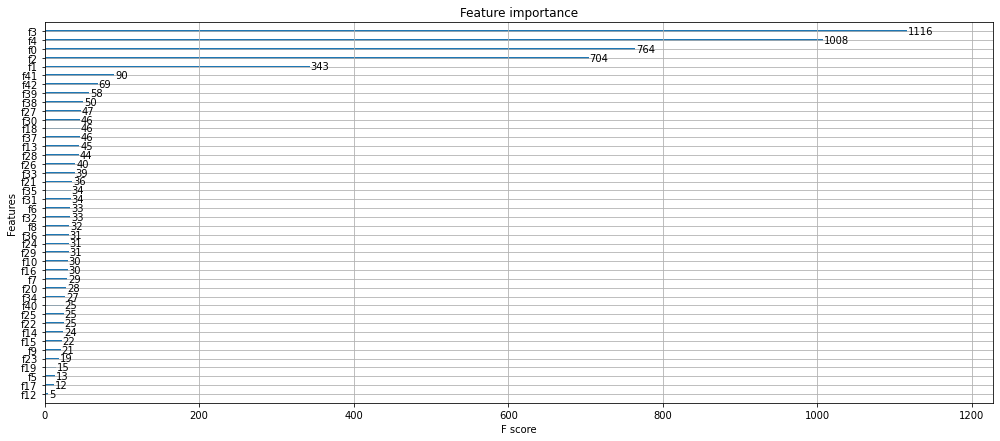

In [65]:
feature_importances, result = training_regression_models(df = data_v2, 
                                                             col_list = cols_removd_target,
                                                             target_var = "prixmetre" ,
                                                         scaler = StandardScaler(),
                                                        model="XGBoost",
                                                         params_cv= params_cv_xgboost,
                                                         randomsearch_dict = randomsearch_dict,
                                                        nsplits = 2, 
                                                    scor = "neg_mean_absolute_error")
           

In [66]:
result

{'XGBoost': {'r2': 22.701508712594876,
  'mape': 0.2032789716933371,
  'rmse': 64524432.45013688}}

In [67]:
feature_importances.head(5)

,importance
Appartement,0.120957
surface_terrain,0.079767
Paris 18e Arrondissement,0.064667
Paris 17e Arrondissement,0.054522
nombre_pieces_principales,0.053854


In [68]:
feature_importances.tail(5)

,importance
Paris 9e Arrondissement,0.003459
Paris 3e Arrondissement,0.003269
Marseille 1er Arrondissement,0.002394
Marseille 14e Arrondissement,0.001744
Marseille 16e Arrondissement,0.000000


### Class

In [69]:
trainer = Trainer(df = data_v2, 
                                 col_list = cols_removd_target,
                  target_var = "prixmetre" ,
                scaler = StandardScaler(),
                 model="XGBoost",
                 params_cv= params_cv_xgboost,
                     randomsearch_dict = randomsearch_dict,
               nsplits = 2, 
         scor = "neg_mean_absolute_error")

trainer.execute()

**333***  XGBoost
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Score: 0.23050623124868494
Best Hyperparameters: {'min_child_weight': 7, 'max_depth': 4, 'learning_rate': 0.15, 'gamma': 0.0, 'colsample_bytree': 0.3}


{'Model': 'XGBoost', 'R2': 22.701508712594876, 'MAE': 0.2, 'RMSE': 64524432.45}

In [70]:
trainer.get_feature_importances().head(5)

**333***  XGBoost
Fitting 3 folds for each of 2 candidates, totalling 6 fits


,importance
Appartement,0.120957
surface_terrain,0.079767
Paris 18e Arrondissement,0.064667
Paris 17e Arrondissement,0.054522
nombre_pieces_principales,0.053854


In [71]:
trainer.get_feature_importances_importances().tail(5)

**333***  XGBoost
Fitting 3 folds for each of 2 candidates, totalling 6 fits


,importance
Paris 9e Arrondissement,0.003459
Paris 3e Arrondissement,0.003269
Marseille 1er Arrondissement,0.002394
Marseille 14e Arrondissement,0.001744
Marseille 16e Arrondissement,0.000000


# Test import touchfinal.py

In [73]:
pwd

'/Users/kenzaelhoussaini/code/Jehadel'

In [74]:
cd ../..

/Users/kenzaelhoussaini


In [77]:
from reestimator.reestimator.trainerFinal import Trainer 

In [78]:
df_test = data_t4.copy() # to test the package 

In [79]:
#df_new = data_t4.copy()
cols = list(df_test.columns)

columns_todrop = ['id_mutation', 'date_mutation',
         'adresse_nom_voie', 'adresse_code_voie',
  'code_commune', 'code_postal',
 'code_departement',
 'id_parcelle', 'valeur_fonciere', 'Paris 10e Arrondissement'
 ]


for i in columns_todrop:
    cols.remove(i)
    
cols_removd_target = cols[:]
cols_removd_target.remove('prixmetre')

data_v5 = df_test[cols]  ## Get Data


reg = 2
forest = 2
xgboost = 2

randomsearch_dict = {"reg_iter": reg,
                  "forest_iter": forest,
                   "xgboost_iter": xgboost} 

#Example of parameters for randomsearch for Ridge and Lasso models :**
# LinearRegession() is equivalent to Lasso() with alpha = 0
params_cv_reg = dict()
params_cv_reg['alpha'] = list(range(3)) 
params_cv_reg['fit_intercept'] = [True, False]
params_cv_reg['normalize'] = [False, True]

In [80]:
trainer = Trainer(df = data_v5, 
                                 col_list = cols_removd_target,
                  target_var = "prixmetre" ,
                scaler = StandardScaler(),
                 model="Ridge",
                 params_cv= params_cv_reg,
                     randomsearch_dict = randomsearch_dict,
               nsplits = 2, 
         scor = "neg_mean_absolute_error")

trainer.execute()

Best Score: -12679.058206306068
Best Hyperparameters: {'normalize': False, 'fit_intercept': False, 'alpha': 0}


{'Model': 'Ridge', 'R2': -2467.08479046993, 'MAE': 1.08, 'RMSE': 2142857983.35}

In [81]:
#Example of parameters for randomsearch for Randomforest model :**
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 3)] # number of trees 
                                                                                    #in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 3)] # maximum number of levels
                                                                        #allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

params_cv_forest = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}    

In [82]:
trainer = Trainer(df = data_v5, 
                                 col_list = cols_removd_target,
                  target_var = "prixmetre" ,
                scaler = StandardScaler(),
                 model="RandomForest",
                 params_cv= params_cv_forest,
                     randomsearch_dict = randomsearch_dict,
               nsplits = 2, 
         scor = "neg_mean_absolute_error")

trainer.execute()

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Score: 0.040678388445020676
Best Hyperparameters: {'n_estimators': 1, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 65, 'bootstrap': True}


{'Model': 'RandomForest',
 'R2': 4.251378665542093,
 'MAE': 0.23,
 'RMSE': 79925563.18}

[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1; total time=   0.2s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1; total time=   0.2s
[CV] END bootstrap=False, max_depth=120, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1; total time=   1.0s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1; total time=   0.2s
[CV] END bootstrap=False, max_depth=120, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1; total time=   1.4s
[CV] END bootstrap=False, max_depth=120, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1; total time=   0.6s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1; total time=   0.2s
[CV] END bootstrap=False, max_depth=120, max_features=au

# class Encoder()

In [86]:
class Encoder():
    
    """ Initialize dataframe
    """
    def __init__(self, df):

        self.df = df
        
    def execute(self, col_name):
        
        L = list(self.df[col_name].unique())
        if '' in L:
            self.df[col_name].replace("", "NoValue", inplace=True) #Replace NaN by "NoCodeNature"

        ohe = OneHotEncoder(sparse = False) # Instanciate encoder
        ohe.fit(self.df[[col_name]]) # Fit encoder  ---> OneHotEncoder(sparse=False)

        col_encoded = ohe.transform(self.df[[col_name]]) # Encode

        dicts_col = {}
        keys = list(ohe.categories_[0])
        values = col_encoded.T.astype(int)

        for i,j in enumerate(keys):
            dicts_col[j] = values[i,:]

        result = pd.DataFrame.from_dict(dicts_col)

        self.df = self.df.reset_index(drop=True)

        #Concat df and result dataframes
        data_res = pd.concat([self.df, result], axis = 1)

        if 'NoValue' in list(data_res.columns):
            data_res = data_res.drop(columns= ['NoValue',col_name] )
        else:
            data_res = data_res.drop(columns= col_name)

        return data_res        

In [216]:
df2.shape

(68840, 17)

In [217]:
df2.columns

Index(['id_mutation', 'date_mutation', 'valeur_fonciere', 'adresse_nom_voie',
       'adresse_code_voie', 'code_postal', 'code_commune', 'nom_commune',
       'code_departement', 'id_parcelle', 'type_local', 'surface_reelle_bati',
       'nombre_pieces_principales', 'surface_terrain', 'longitude', 'latitude',
       'prixmetre'],
      dtype='object')

In [218]:
encoder = Encoder(df = df2)
res = encoder.execute(col_name = 'nom_commune')
res.shape

(68840, 53)

In [219]:
res.columns

Index(['id_mutation', 'date_mutation', 'valeur_fonciere', 'adresse_nom_voie',
       'adresse_code_voie', 'code_postal', 'code_commune', 'code_departement',
       'id_parcelle', 'type_local', 'surface_reelle_bati',
       'nombre_pieces_principales', 'surface_terrain', 'longitude', 'latitude',
       'prixmetre', 'Marseille 10e Arrondissement',
       'Marseille 11e Arrondissement', 'Marseille 12e Arrondissement',
       'Marseille 13e Arrondissement', 'Marseille 14e Arrondissement',
       'Marseille 15e Arrondissement', 'Marseille 16e Arrondissement',
       'Marseille 1er Arrondissement', 'Marseille 2e Arrondissement',
       'Marseille 3e Arrondissement', 'Marseille 4e Arrondissement',
       'Marseille 5e Arrondissement', 'Marseille 6e Arrondissement',
       'Marseille 7e Arrondissement', 'Marseille 8e Arrondissement',
       'Marseille 9e Arrondissement', 'Nice', 'Paris 10e Arrondissement',
       'Paris 11e Arrondissement', 'Paris 12e Arrondissement',
       'Paris 13e Arrondi

In [93]:
encoder2 = Encoder(df = res)
res_final = encoder2.execute(col_name= 'type_local')
res_final.shape

(68840, 54)

In [95]:
test = df.copy()
test.shape

(292510, 17)

In [96]:
test.head(5)

,id_mutation,date_mutation,nature_mutation,valeur_fonciere,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
0,2016-36031,2016-01-05,Vente,129000,RUE DU CHATEAU,1335,6300,6088,Nice,6,06088000KR0130,Appartement,38,1,0,7.277516,43.696437
1,2016-36032,2016-01-07,Vente,154000,AV DES ARENES DE CIMIEZ,0325,6000,6088,Nice,6,06088000LE0233,Appartement,38,2,0,7.279226,43.705106
2,2016-36035,2016-01-06,Vente,134000,AV RENE BOYLESVE,5420,6100,6088,Nice,6,06088000EB0093,Appartement,48,2,0,7.255168,43.717018
3,2016-36035,2016-01-06,Vente,134000,AV RENE BOYLESVE,5420,6100,6088,Nice,6,06088000EB0093,Appartement,38,2,0,7.255168,43.717018
4,2016-36036,2016-01-08,Vente,137000,BD ARMEE DES ALPES,0360,6300,6088,Nice,6,06088000IV0440,Appartement,40,2,0,7.293505,43.708142


In [97]:
test['type_local'].unique()

array(['Appartement', 'Maison', 'Dépendance'], dtype=object)

In [98]:
len(test['nom_commune'].unique())

37

In [99]:
encoder = Encoder(df = test)
res = encoder.execute(col_name = 'nom_commune')
res.shape

(292510, 53)

In [100]:
encoder2 = Encoder(df = res)
res_final = encoder2.execute(col_name= 'type_local')
res_final.shape

(292510, 55)

# Feature selection

In [199]:
class FeatureSelection():
    
    def __init__(self, df, col_list, target_var , model = LinearRegression()):
        
        self.df = df
        self.col_list = col_list
        self.target_var = target_var
        self.model = model
        
    def define_dataset(self, df, col_list, target_var):
        # define dataset
        y = self.df[self.target_var]
        X = self.df[self.col_list]
        return X,y
    
    # fit the model
    def fit(self, X,y): 
        X,y = self.define_dataset(self.df, self.col_list, self.target_var)
        self.model.fit(X, y)     
        reg_coefs = self.model.coef_ # get regression coefficients
        return reg_coefs
    
    def get_coefs_regression(self):
        
        X,y = self.define_dataset(self.df, self.col_list, self.target_var)
        coefs = self.fit(X,y)
        K = []
        F = []
        
        for i in coefs.tolist():
            K.append(np.abs(i))

        ind  =  sorted(range(len(K)), reverse=True, key=lambda c: K[c])
        K.sort(reverse= True)
        
        for i in ind:
            F.append(self.col_list[i])
          
        dicts = {'Features': F, 'Regression_coef': K, 'Regression_coef(%)': K/max(K)}
        
        return pd.DataFrame.from_dict(dicts) 
        
     # Calculating VIF      
    def calculate_VIF(self):
        X,y = self.define_dataset(self.df, self.col_list, self.target_var)   
        vif = pd.DataFrame()
        vif["Features"] = X.columns
        vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        sorted_VIF = vif.sort_values(by='VIF', ascending= False)  #sort dataframe
        
        return sorted_VIF   
        
        
    def plot_reg_coefs(self):
        dicts = self.get_coefs_regression()
        F, K = dicts['Features'], dicts['Regression_coef']
        
        fig, ax = plt.subplots(figsize = (15,4))
        # plot feature importance
        plt.bar([x for x in range(len(K))], K)
        plt.xlabel("Features")
        plt.xticks(range(len(F)), F,
          rotation = 45)
        plt.xlabel("Regression coefficients")
        plt.show()
        
        
    def correlation_matrix(self,size_x,size_y, color):

        # Using Pearson Correlation
        plt.figure(figsize=(size_x,size_y))
        sns.heatmap(self.df.corr(), annot=True,  fmt='.2f', linecolor='black', cmap= color)
        plt.show()

        

## Testing class

In [174]:
df_new = data_t4.copy()
cols = list(df_new.columns)

columns_todrop = ['id_mutation', 'date_mutation',
         'adresse_nom_voie', 'adresse_code_voie',
  'code_commune', 'code_postal',
 'code_departement',
 'id_parcelle', 'valeur_fonciere',
 ]

for i in columns_todrop:
    cols.remove(i)
    
cols_removd_target = cols[:]
cols_removd_target.remove('prixmetre')

data_v2 = df_new[cols]

In [175]:
data_v2.shape

(68840, 45)

In [185]:
feature = FeatureSelection(df = data_v2, col_list =cols_removd_target, target_var='prixmetre')

In [186]:
feature.get_coefs_regression()

,Features,Regression_coef,Regression_coef(%)
0,Marseille 2e Arrondissement,20500.745573,1.000000
1,Marseille 1er Arrondissement,5722.718781,0.279147
2,Marseille 13e Arrondissement,5246.897770,0.255937
3,Marseille 15e Arrondissement,5085.653664,0.248072
4,Nice,3721.922488,0.181551
5,Marseille 16e Arrondissement,3621.899699,0.176672
6,Paris 7e Arrondissement,2988.950697,0.145797
7,Paris 6e Arrondissement,2890.328378,0.140987
8,Paris 8e Arrondissement,2499.354641,0.121915
9,Marseille 3e Arrondissement,2410.420942,0.117577


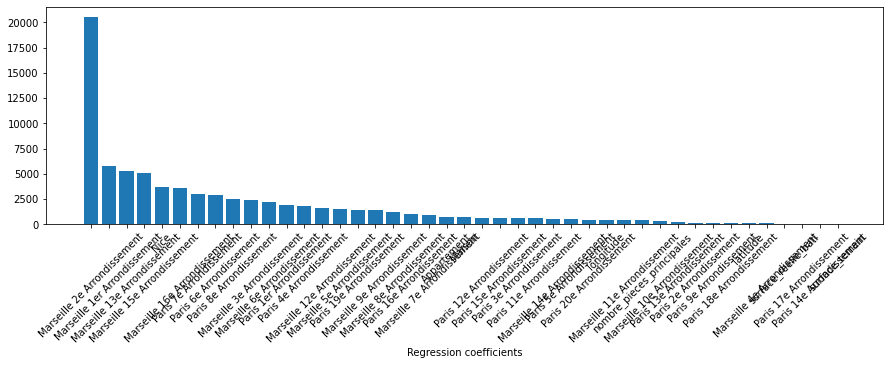

In [187]:
feature.plot_reg_coefs()

In [188]:
feature.calculate_VIF()

,Features,VIF
41,Appartement,1452.579974
3,longitude,72.030261
21,Nice,57.704847
42,Maison,18.012365
18,Marseille 7e Arrondissement,5.603625
4,latitude,5.506886
19,Marseille 8e Arrondissement,4.972452
0,surface_reelle_bati,4.319251
12,Marseille 1er Arrondissement,4.228019
17,Marseille 6e Arrondissement,4.113066


In [189]:
df_new = data_t4.copy()
cols = list(df_new.columns)

columns_todrop = ['id_mutation', 'date_mutation',
         'adresse_nom_voie', 'adresse_code_voie',
  'code_commune', 'code_postal',
 'code_departement',
 'id_parcelle', 'valeur_fonciere','Paris 10e Arrondissement'
 ]

for i in columns_todrop:
    cols.remove(i)
    
cols_removd_target = cols[:]
cols_removd_target.remove('prixmetre')

data_v2 = df_new[cols]


feature = FeatureSelection(df = data_v2, col_list =cols_removd_target, target_var='prixmetre' )
feature.calculate_VIF().head(5)

,Features,VIF
41,Appartement,1452.579974
3,longitude,72.030261
21,Nice,57.704847
42,Maison,18.012365
18,Marseille 7e Arrondissement,5.603625


In [190]:
feature.calculate_VIF().tail(5)

,Features,VIF
33,Paris 2e Arrondissement,1.494505
30,Paris 19e Arrondissement,1.442504
31,Paris 1er Arrondissement,1.373258
11,Marseille 16e Arrondissement,1.237501
2,surface_terrain,1.163341


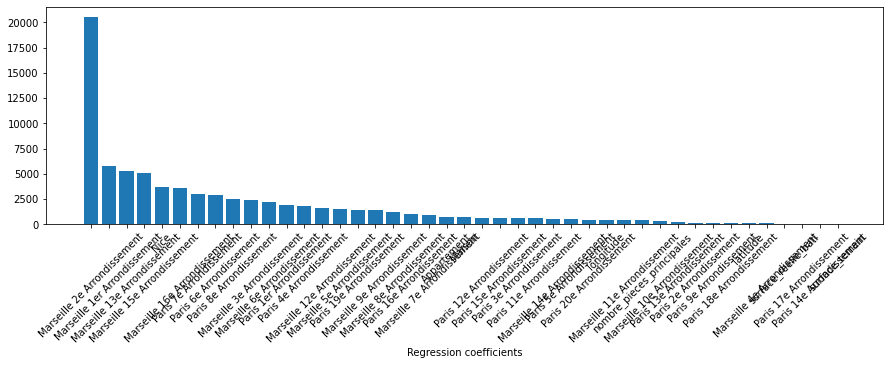

In [191]:
feature.plot_reg_coefs()

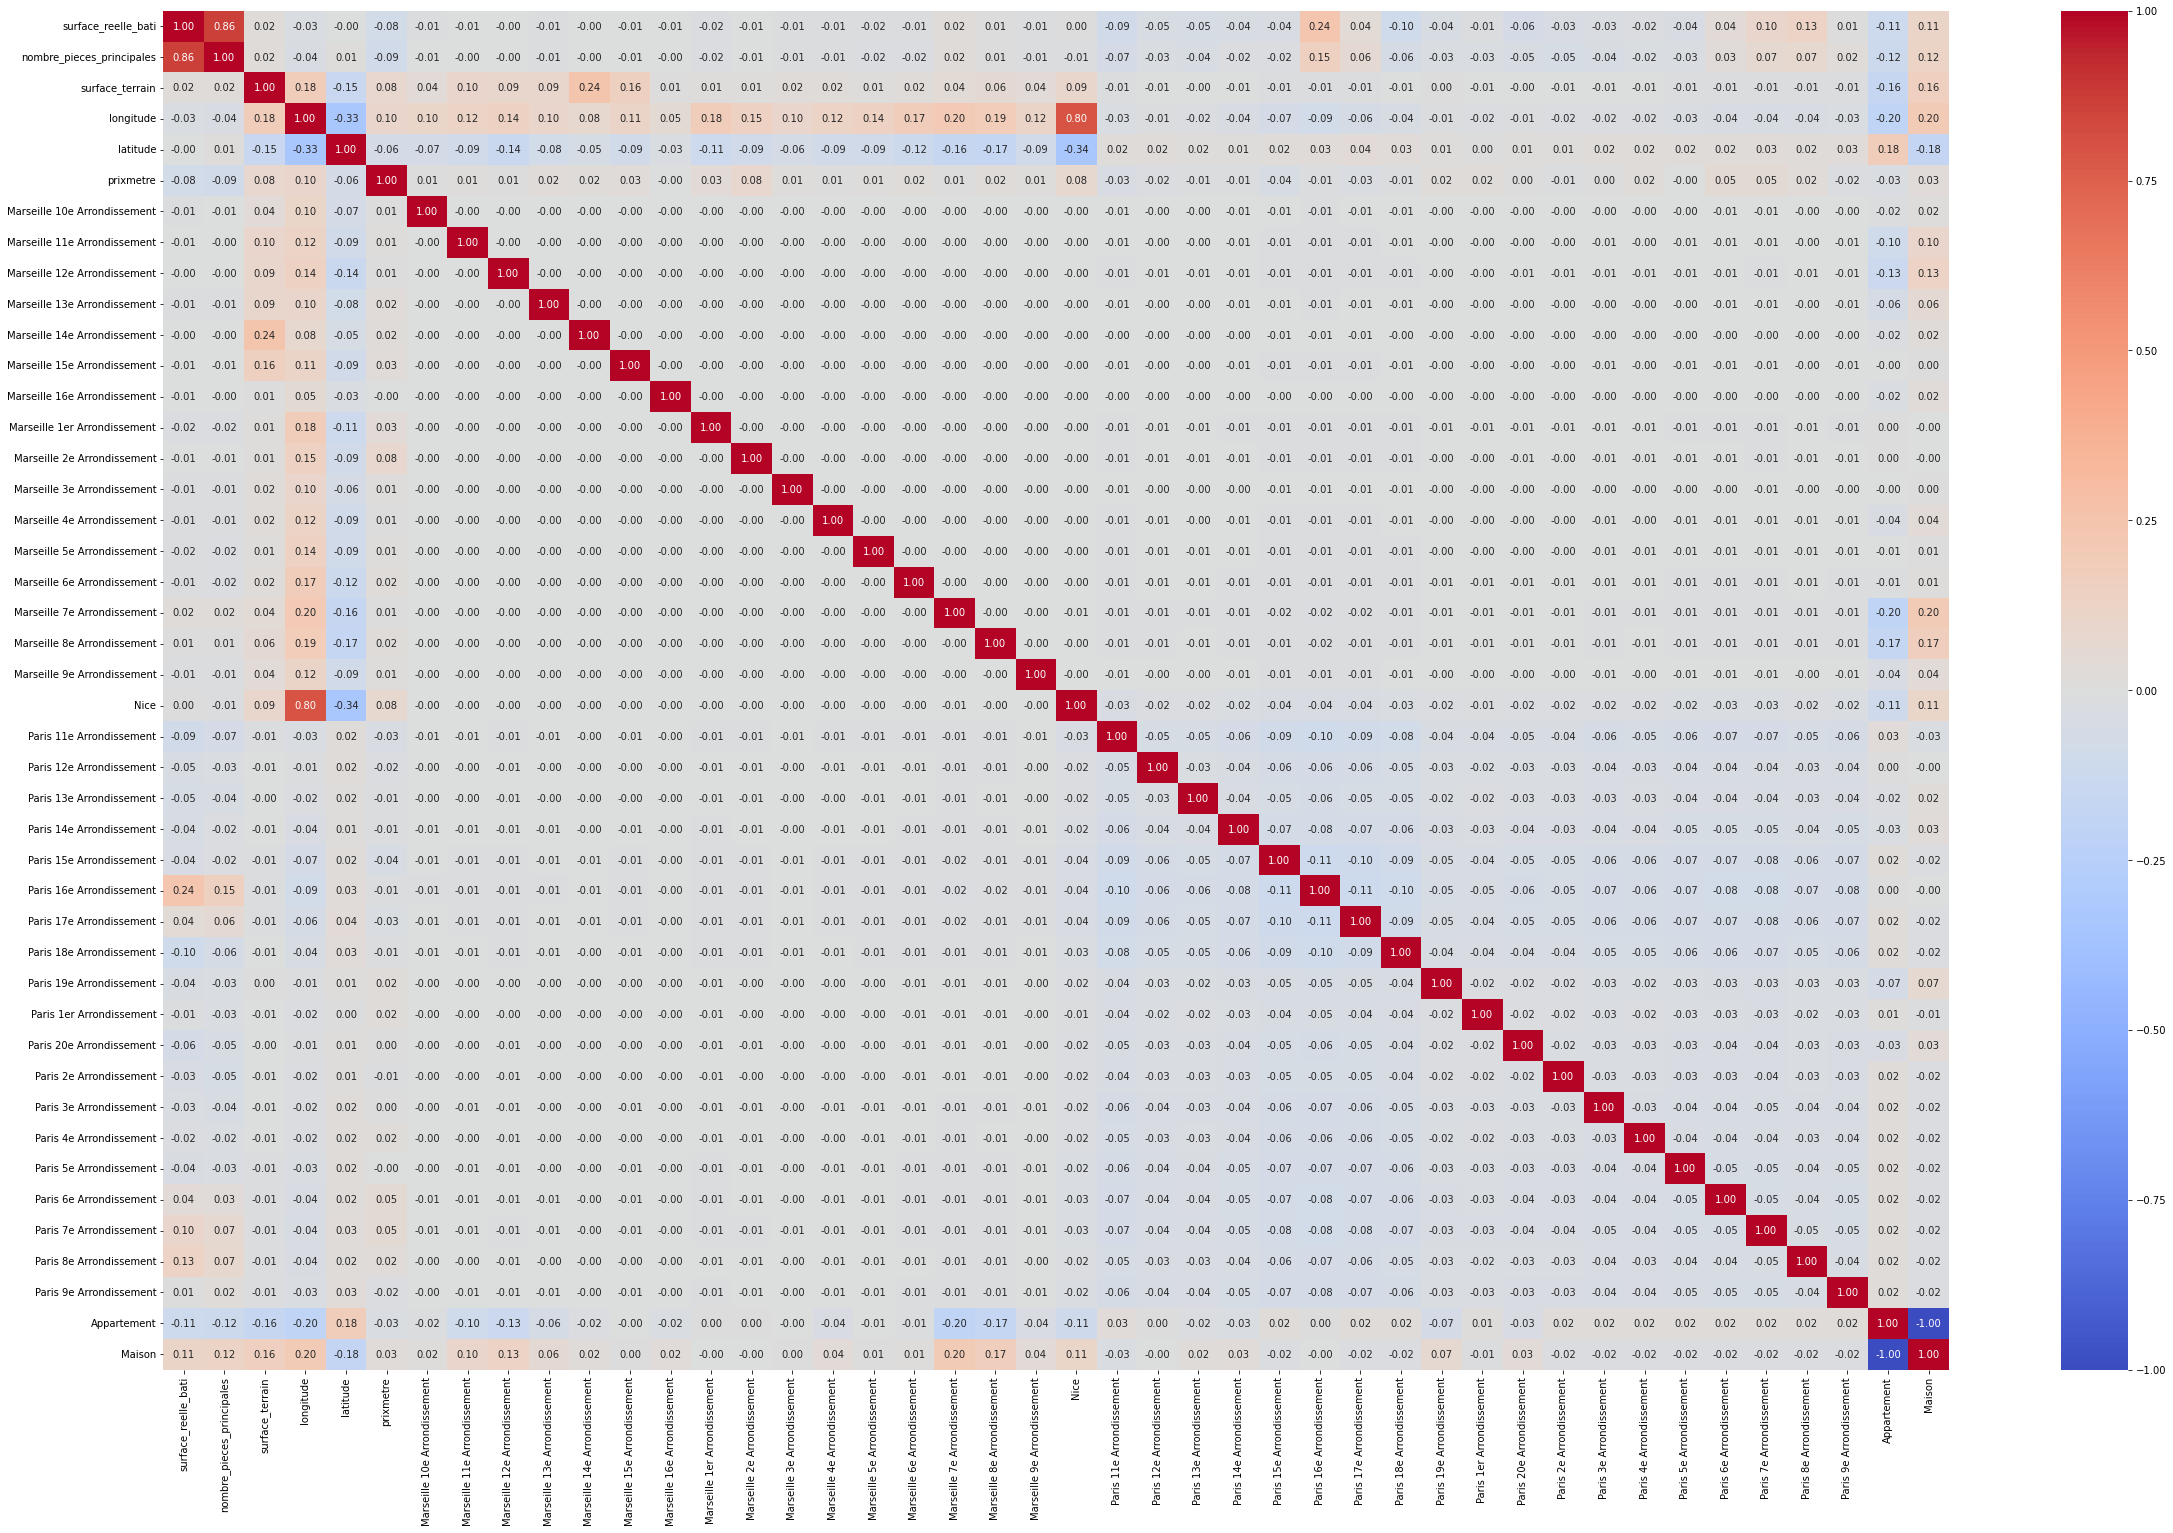

In [213]:
feature = FeatureSelection(df = data_v2, col_list =cols_removd_target, target_var='prixmetre' )
feature.correlation_matrix(40, 25, 'coolwarm')

# Improving Function : encoding_categ_column

In [214]:
data_v2.columns

Index(['surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain',
       'longitude', 'latitude', 'prixmetre', 'Marseille 10e Arrondissement',
       'Marseille 11e Arrondissement', 'Marseille 12e Arrondissement',
       'Marseille 13e Arrondissement', 'Marseille 14e Arrondissement',
       'Marseille 15e Arrondissement', 'Marseille 16e Arrondissement',
       'Marseille 1er Arrondissement', 'Marseille 2e Arrondissement',
       'Marseille 3e Arrondissement', 'Marseille 4e Arrondissement',
       'Marseille 5e Arrondissement', 'Marseille 6e Arrondissement',
       'Marseille 7e Arrondissement', 'Marseille 8e Arrondissement',
       'Marseille 9e Arrondissement', 'Nice', 'Paris 11e Arrondissement',
       'Paris 12e Arrondissement', 'Paris 13e Arrondissement',
       'Paris 14e Arrondissement', 'Paris 15e Arrondissement',
       'Paris 16e Arrondissement', 'Paris 17e Arrondissement',
       'Paris 18e Arrondissement', 'Paris 19e Arrondissement',
       'Paris 1er Arrondissem

In [ ]:
def encoding_categ_column(df, col_name):
    
    L = list(df[col_name].unique())
    if '' in L:
        df[col_name].replace("", "NoValue", inplace=True) #Replace NaN by "NoCodeNature"
    
    ohe = OneHotEncoder(sparse = False) # Instanciate encoder
    ohe.fit(df[[col_name]]) # Fit encoder  ---> OneHotEncoder(sparse=False)
    
    col_encoded = ohe.transform(df[[col_name]]) # Encode

    dicts_col = {}
    keys = list(ohe.categories_[0])
    values = col_encoded.T.astype(int)
    
    for i,j in enumerate(keys):
        dicts_col[j] = values[i,:]

    result = pd.DataFrame.from_dict(dicts_col)
    
    df = df.reset_index(drop=True)
    
    #Concat df and result dataframes
    data_res = pd.concat([df, result], axis = 1)
    
    if 'NoValue' in list(data_res.columns):
        data_res = data_res.drop(columns= ['NoValue',col_name] )
    else:
        data_res = data_res.drop(columns= col_name)
        
    return data_res 